[[ 9.99999938e-01  2.13260723e-04 -2.79773179e-04]
 [-2.13263731e-04  9.99999977e-01 -1.07232856e-05]
 [ 2.79770886e-04  1.07829504e-05  9.99999961e-01]]


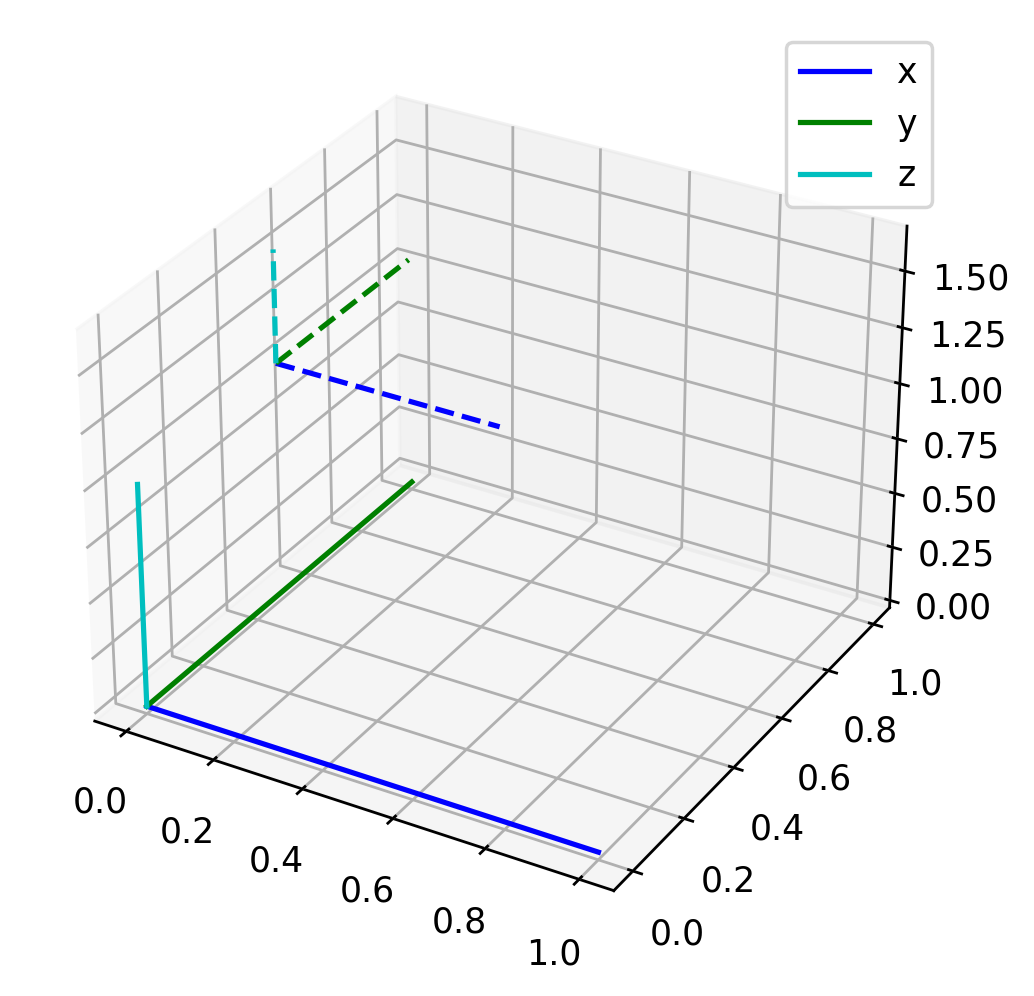

In [11]:

import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d

class RT_PLOT():
    def __init__(self):
        self.glob_coord = np.array([[1,0,0], [0,1,0],[0,0,1]])

    def rot_mat(self, angles:list):
        Rx = np.array([[1,                   0,                  0],
                       [0,   np.cos(angles[0]), -np.sin(angles[0])],
                       [0,   np.sin(angles[0]),  np.cos(angles[0])]])

        Ry = np.array([[ np.cos(angles[1]),    0,   np.sin(angles[1])],
                       [                 0,    1,                   0],
                       [-np.sin(angles[1]),    0,   np.cos(angles[1])]])

        Rz = np.array([[np.cos(angles[2]),  -np.sin(angles[2]), 0],
                       [np.sin(angles[2]),   np.cos(angles[2]), 0],
                       [                0,                   0, 1]])

        rot = Rx@Ry@Rz 
        return rot

    def get_R_T_matrix(self, ang, disp):
        ang = -np.array(ang)*np.pi/180
        # get rotation matrix
        R = np.array(self.glob_coord @ self.rot_mat(ang))
        # make RT matrix
        T = np.array(np.zeros([4,4]))
        for i in range(3):
            for j in range(3):
                if np.abs(R[i,j]) < (1.0e-15) :
                    R[i,j] = 0
                T[i,j] = R[i,j]
        for i in range(4):
            if i != 3:
                T[i,3] = disp[i]
            else:
                T[3,3] = 1
        return R, T

    def plot_coords(self, ang:list, disp:list):
        
        # objetc coordinate
        R, T = self.get_R_T_matrix(ang, disp)
        new_coord = self.glob_coord @ R
        new_coord = np.array(new_coord)
        print(new_coord)
        scale = 0.5
        x = [[T[0,3], T[0,3]+new_coord[0,0]*scale], [T[1,3], T[1,3]+new_coord[0,1]*scale], [T[2,3],T[2,3]+new_coord[0,2]*scale]]
        y = [[T[0,3], T[0,3]+new_coord[1,0]*scale], [T[1,3], T[1,3]+new_coord[1,1]*scale], [T[2,3],T[2,3]+new_coord[1,2]*scale]]
        z = [[T[0,3], T[0,3]+new_coord[2,0]*scale], [T[1,3], T[1,3]+new_coord[2,1]*scale], [T[2,3],T[2,3]+new_coord[2,2]*scale]]

        # pyplot config
        fig = plt.figure(dpi=250)
        ax = plt.axes(projection='3d')
        
        # plot global coordinate
        ax.plot([0,1], [0,0], [0,0], 'b-') # - blue: x 
        ax.plot([0,0], [0,1], [0,0], 'g-') # - green: y
        ax.plot([0,0], [0,0], [0,1], 'c-') # - cian: z
        # plot object coordinate
        ax.plot(x[0], x[1], x[2], 'b--') # blue: x
        ax.plot(y[0], y[1], y[2], 'g--') # blue: x
        ax.plot(z[0], z[1], z[2], 'c--') # blue: x
        ax.legend(['x', 'y', 'z'])

        plt.show()
    




disp = [5.22497978e+04*10**(-6), 4.09878815e+05*10**(-6),1.16179822e+06*10**(-6)] #

ang = [-3.52024714e-02*(np.pi/180),9.18441181e-01*(np.pi/180),7.00093687e-01*(np.pi/180)]
# [deg]


rt_plt = RT_PLOT()
rt_plt.plot_coords(ang, disp)

[[-0.78194463 -0.53225928 -0.32444207]
 [-0.01288932  0.53417787 -0.84527384]
 [ 0.62321462 -0.6567755  -0.42455798]]


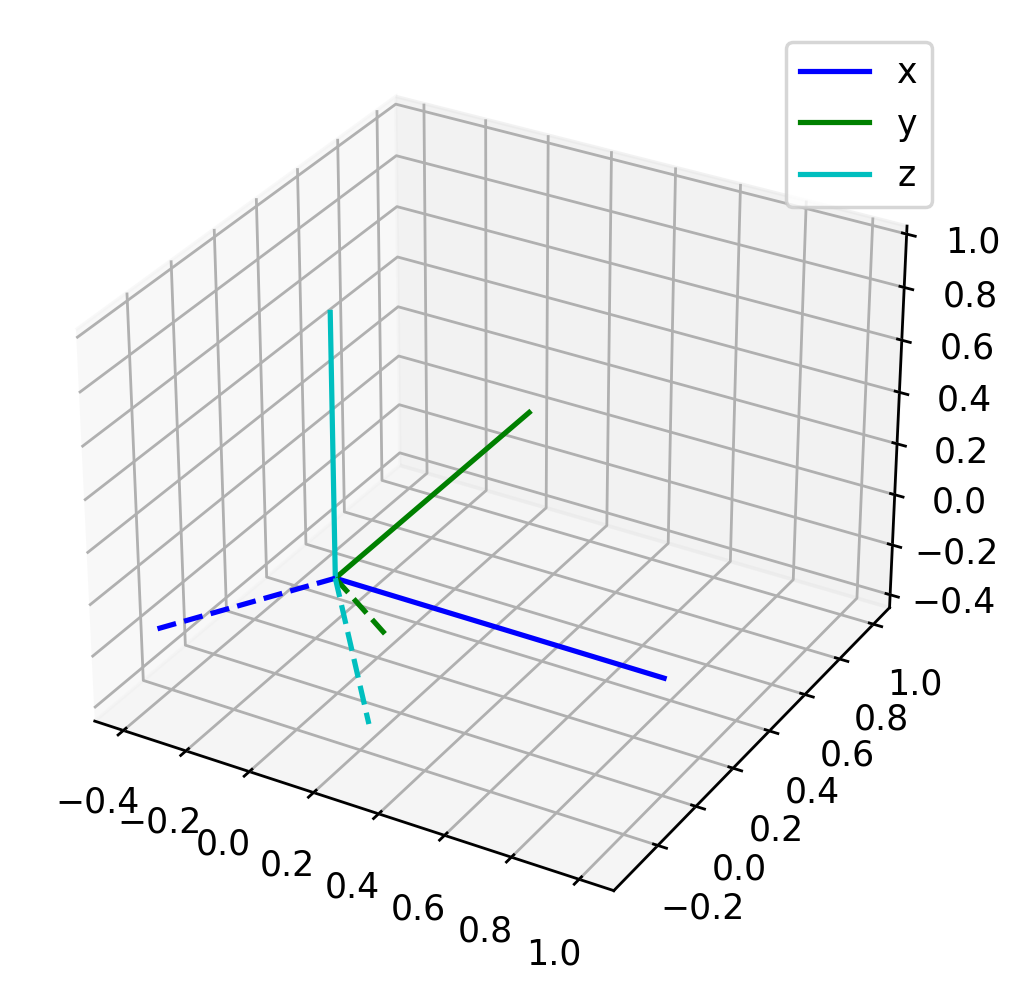

In [19]:

glob_coord = np.array([[1,0,0], [0,1,0],[0,0,1]])


# objetc coordinate
R = np.array(([-7.819446298560702724e-01, -1.288931952342973510e-02, 6.232146189568055217e-01],
              [-5.322592787309246010e-01, 5.341778707625217670e-01, -6.567755039528002658e-01],
              [-3.244420688568134259e-01, -8.452738419174236073e-01, -4.245579773435768645e-01]))

T = np.array(([-7.819446298560702724e-01, -1.288931952342973510e-02, 6.232146189568055217e-01, 1.147030335639109166e+00],
              [-5.322592787309246010e-01, 5.341778707625217670e-01, -6.567755039528002658e-01, 3.492290649500348620e-01],
               [-3.244420688568134259e-01, -8.452738419174236073e-01, -4.245579773435768645e-01 ,4.260203930485161328e-01],
            [0, 0, 0, 1]))
R = R.T
T = T.T
new_coord = glob_coord @ R
new_coord = np.array(new_coord)
print(new_coord)
scale = 0.5
x = [[T[0,3], T[0,3]+new_coord[0,0]*scale], [T[1,3], T[1,3]+new_coord[0,1]*scale], [T[2,3],T[2,3]+new_coord[0,2]*scale]]
y = [[T[0,3], T[0,3]+new_coord[1,0]*scale], [T[1,3], T[1,3]+new_coord[1,1]*scale], [T[2,3],T[2,3]+new_coord[1,2]*scale]]
z = [[T[0,3], T[0,3]+new_coord[2,0]*scale], [T[1,3], T[1,3]+new_coord[2,1]*scale], [T[2,3],T[2,3]+new_coord[2,2]*scale]]

# pyplot config
fig = plt.figure(dpi=250)
ax = plt.axes(projection='3d')

# plot global coordinate
ax.plot([0,1], [0,0], [0,0], 'b-') # - blue: x 
ax.plot([0,0], [0,1], [0,0], 'g-') # - green: y
ax.plot([0,0], [0,0], [0,1], 'c-') # - cian: z
# plot object coordinate
ax.plot(x[0], x[1], x[2], 'b--') # blue: x
ax.plot(y[0], y[1], y[2], 'g--') # blue: x
ax.plot(z[0], z[1], z[2], 'c--') # blue: x
ax.legend(['x', 'y', 'z'])

plt.show()

In [3]:
from scipy.spatial.transform import Rotation   



R = np.array(([8.045017123222351074e-01, -2.037209272384643555e-01, 5.579200983047485352e-01],
            [-5.914024114608764648e-01, -1.878403425216674805e-01, 7.841933369636535645e-01],
            [-5.495670065283775330e-02, -9.608401656150817871e-01, -2.715989053249359131e-01]))

### first transform the matrix to euler angles
r =  Rotation.from_matrix(R)
angles = r.as_euler("zyx",degrees=True)

#### Modify the angles
print(angles*(np.pi/180))


[ 0.2480128   0.59187745 -1.90420844]
